# Análisis de componentes principales (PCA)

Las componentes principales son una colección de proyecciones de las variables, incorreladas (ortogonales) y ordenadas de mayor a menor varianza.
En términos algebraicos, nuestro objetivo es encontrar una base ortogonal del espacio de variables de entrada (considerando como producto interno al covarianza), y quedarnos con algunos elementos de ella, suficientes como para poder explicar la mayor parte de la varianza de la variable objetivo.

Sean $X_1, ..., X_N$ variables aleatorias cuya distribución o densidad sean conocidas. En estas circunstancias, seríamos capaces de construir la matriz de covarianzas $\text{Cov}(X_i,X_j)_{1\le i,j\le N}$, y para encontrar las componentes principales, no tendríamos más que diagonalizar esta matriz. De esta manera, obtendríamos $Z_1,...,Z_M$ autovectores ($M\le N$) y $\lambda_1,..,\lambda_M$ sus autovalores asociados (donde podría ser $\lambda_i = \lambda_k$ para ciertos $i,k \in \{1,...,M\}$). De  esta manera es posible que hayamos eliminado variables redundantes (puesto que $M\le N$) y conoceríamos, a través de los autovalores, que direcciones implican la mayor varianza. Si algunas fuera residuales en ese sentido, podríamos obviarlas, y quedarnos con una lista reducida de variables  $Z_i$ con la que pudiéramos explicar la mayor parte de la varianza.

Las cosas no son tan directas cuando se trabaja con problemas reales donde el algoritmo PCA pueda ser útil. La idea se reduce a lo expuesto hasta ahora, pero la resolución y su coste no es tan sencilla. Por su importancia a la hora de calcular als componentes principales, vamos a profundizar un poco en la descomposición en valores singulares (SVD - Singular Value Decomposition).

 La SVD es una factorización de una matriz (real o compleja) en una rotación seguida de un rescalado seguido de otra rotación. Es una generalización de la diagonalización de matriz cuadradas normales $X=P^TDP$ donde $P$ es la matriz de autovectores y $D$ es una matriz diagonal que contiene los autovalores. Para una matriz real $M$ de dimensión $m\times n$, la SVD es de la forma $M=U\Sigma V^T$, donde $U$ es una matriz unitaria $m\times m$ (es decir, $U^TU=I_m$),  $\Sigma$  es una matriz rectangular $m\times n$ diagonal con valores reales no negativos en la diagonal y $V$ es una matriz unitaria $n\times n$. Hay una serie de resultados justificando que dicha descomposición existe, y que si exigimos que los valores de la matriz diagonale estén en orden decreciente, entonces dicha descomposición también es única.

Sea $X$ una matriz de dimensión $n\times p$ conteniendo nuestras $n$ observaciones de las $p$ variables de entrada. La matriz de covarianza muestra está dada por la expresión $S=X^TX/n$. Sea $UDV^T$ la SVD de la matriz $X$, entonces: 
$$ S=\dfrac{VD^2V^T}{n}$$
que es una diagonalización de la matriz $S$. De esta manera, hemos obtenido las comoponentes principares de las variables en $X$ (que son las columnas de la matriz $V$) y sus varianzas (que son los valores de la diagonal de $D^2$).

Tras esta discusión, es claro por qué la SVD juega un papel importante en el cómputo de PCA, y su uso está ampliamente establecido.

### Ejemplo

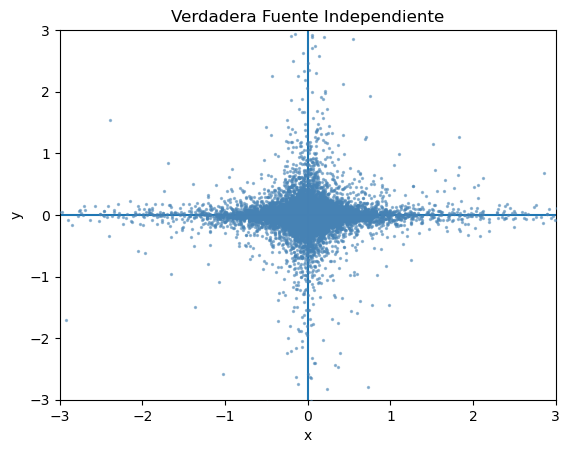

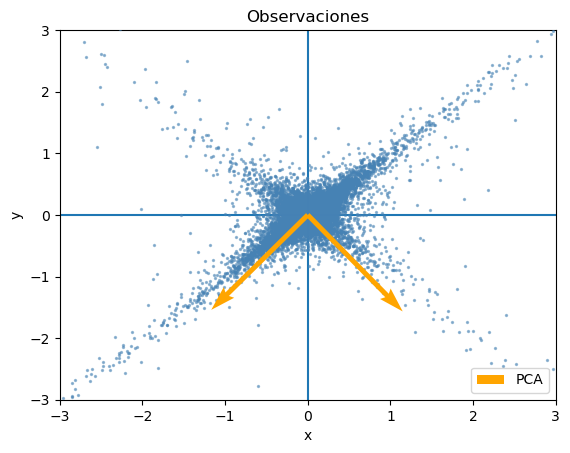

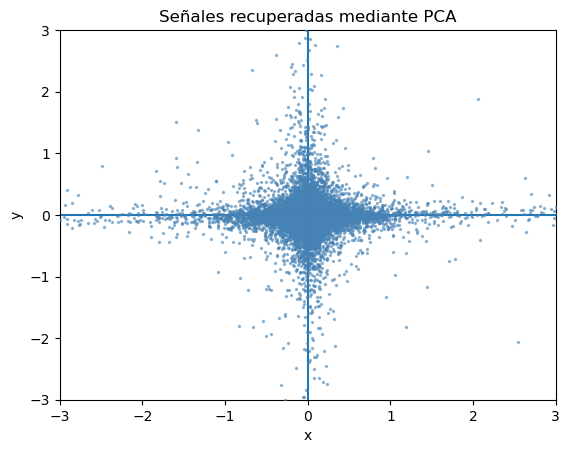

In [2]:
import numpy as np

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

rng = np.random.RandomState(42)
S = rng.standard_t(1.5, size=(20000, 2))
S[:, 0] *= 2.0

# Construimos un dataset con combinaciones lineales de nuestra observaciones independientes iniciales
A = np.array([[1, 1], [1, -1]])  # Matriz de mezcla
X = np.dot(S, A)  # Generamos las observaciones

#ddefinimos pca como una instancia de la clase PCA de sklearn
pca = PCA()
#resolvemos 
pca.fit(X)
# recuperamos la observaciones "originales" --> estamos extrayendo variables indep de las observaciones mezcladas
S_pca_ = pca.transform(X)

def plot_samples(S, axis_list=None):
    plt.scatter(
        S[:, 0], S[:, 1], s=2, marker="o", zorder=10, color="steelblue", alpha=0.5
    )
    if axis_list is not None:
        for axis, color, label in axis_list:
            axis /= axis.std()
            x_axis, y_axis = axis
            plt.quiver(
                (0, 0),
                (0, 0),
                x_axis,
                y_axis,
                zorder=11,
                width=0.01,
                scale=6,
                color=color,
                label=label,
            )

    plt.hlines(0, -3, 3)
    plt.vlines(0, -3, 3)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.xlabel("x")
    plt.ylabel("y")


plt.figure()
plot_samples(S / S.std())
plt.title("Verdadera Fuente Independiente")
plt.show()

axis_list = [(pca.components_.T, "orange", "PCA")]
plot_samples(X / np.std(X), axis_list=axis_list)
legend = plt.legend(loc="lower right")
legend.set_zorder(100)
plt.title("Observaciones")
plt.show()

plot_samples(S_pca_ / np.std(S_pca_, axis=0))
plt.title("Señales recuperadas mediante PCA")
plt.show()



Bibliografía: 
- https://scikit-learn.org/stable/modules/decomposition.html#pca
- https://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_vs_pca.html#sphx-glr-auto-examples-decomposition-plot-ica-vs-pca-py
- Trevor, et al. The elements of statistical learning: data mining, inference, and prediction. New York: springer, 2009.
- https://en.wikipedia.org/wiki/Singular_value_decomposition
